# <center> **BÀI TẬP COLAB SỐ 02**
# <center> **PREDICTING EXECUTION TIME OF A PROGRAM WITH GIVEN INPUT SIZE <br> USING LINEAR REGRESSION**

# Thành viên nhóm:
1.	Nguyễn Thị Thúy An - 19521183
2.	Nguyễn Lâm Thảo Vy - 19522547
3. 	Huỳnh Đỗ Tấn Thành - 19522227

#Data importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

In [ ]:
df2=pd.read_csv('data2.csv',names=['size','time'])
df3=pd.read_csv('data3.csv',names=['size','time'])
df4=pd.read_csv('data4.csv',names=['size','time'])

In [ ]:
X=np.array(df2['size']).reshape(-1,1)
y=np.array(df2['time'])
X_test1=np.array(df3['size']).reshape(-1,1)
y_test1=np.array(df3['time'])
X_test2=np.array(df4['size']).reshape(-1,1)
y_test2=np.array(df4['time'])

In [ ]:
def plot_result(X, y_true, y_pred, num):
  fig = plt.figure(dpi=80)
  ax = fig.add_subplot(111)
  ax.set_title("Regression result on Test data " + str(num))
  ax.set_xlabel("Size")
  ax.set_ylabel("Time")
  ax.scatter(X, y_true, s=5, c="b", label = "Test data")
  ax.scatter(X, y_pred, s=5, c="r", label = "Predicted data")
  plt.show()
def evaluate(y_true, predicted):  
  mae = metrics.mean_absolute_error(y_true, predicted)
  mse = metrics.mean_squared_error(y_true, predicted)
  return mae, mse
def print_evaluation(y_true, predicted):  
  mae = metrics.mean_absolute_error(y_true, predicted)
  mse = metrics.mean_squared_error(y_true, predicted)
  print('Mean Absolute Error:', mae)
  print('Mean Squared Error:', mse)

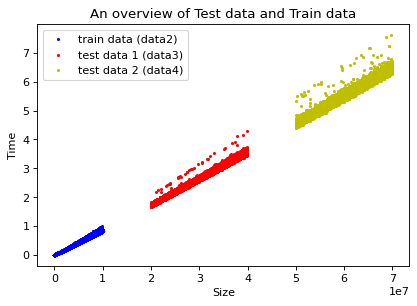

In [ ]:
fig=plt.figure(dpi=80)
ax = fig.add_subplot(111)
ax.set_title("An overview of Test data and Train data", size=12)
ax.set_xlabel("Size", size=10); ax.set_ylabel("Time", size=10)
ax.scatter(X,y, c="b", s=3, label="train data (data2)")
ax.scatter(X_test1,y_test1, s=3, c="r", label="test data 1 (data3)")
ax.scatter(X_test2,y_test2, s=3, c="y", label="test data 2 (data4)")
plt.legend(loc=2)
plt.show()

# RAW DATA

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression().fit(X,y)
y_pred1 = reg.predict(X_test1)
y_pred2 = reg.predict(X_test2)

Mean Absolute Error: 0.12271198006007256
Mean Squared Error: 0.020664949395059667


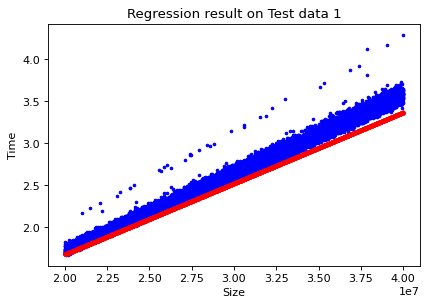

In [ ]:
print_evaluation(y_test1, y_pred1)
plot_result(X_test1, y_test1, y_pred1, 1)

Mean Absolute Error: 0.45201138671168994
Mean Squared Error: 0.22348476815477422


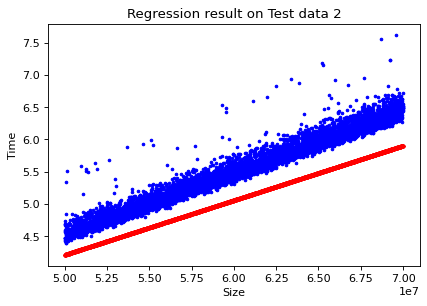

In [ ]:
print_evaluation(y_test2, y_pred2)
plot_result(X_test2, y_test2, y_pred2, 2)

# DATA AFTER PREPROCESSING

## Rescaling data


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler=StandardScaler()
X=std_scaler.fit_transform(X)
X_test1=std_scaler.transform(X_test1)
X_test2=std_scaler.transform(X_test2)

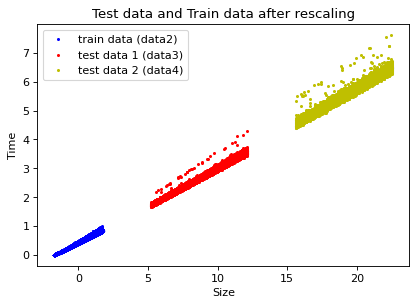

In [ ]:
fig=plt.figure(dpi=80)
ax = fig.add_subplot(111)
ax.set_title("Test data and Train data after rescaling", size=12)
ax.set_xlabel("Size", size=10); ax.set_ylabel("Time", size=10)
ax.scatter(X,y, c="b", s=3, label="train data (data2)")
ax.scatter(X_test1,y_test1, s=3, c="r", label="test data 1 (data3)")
ax.scatter(X_test2,y_test2, s=3, c="y", label="test data 2 (data4)")
plt.legend(loc=2)
plt.show()

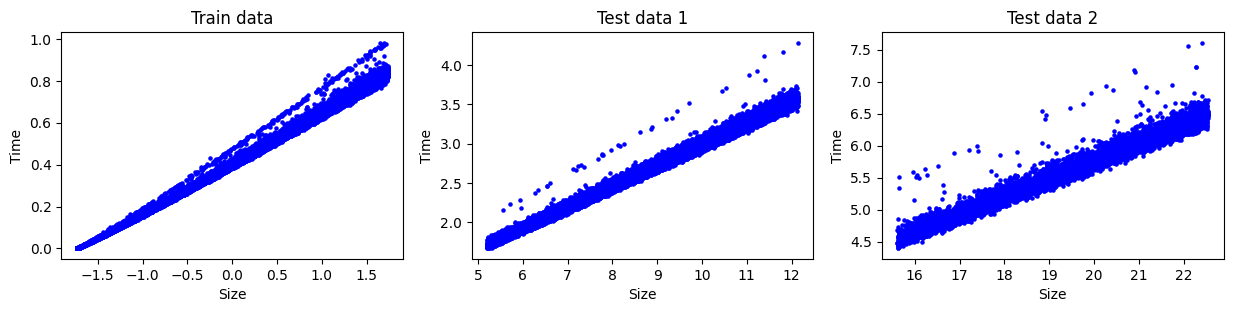

In [ ]:
fig=plt.figure(figsize=[15,3], dpi=100)
title=["Train data", "Test data 1", "Test data 2"]
X_data=[X, X_test1, X_test2]
y_data=[y, y_test1, y_test2]
for i in range(3):
  ax = fig.add_subplot(1,3,i+1)
  ax.set_title(title[i])
  ax.set_xlabel("Size")
  ax.set_ylabel("Time")
  ax.scatter(X_data[i], y_data[i], s=5, c="b")
plt.show()

## Regularization (for Linear Regression to avoid overfitting)

### Ridge Regression 

In [ ]:
from sklearn.linear_model import Ridge

Mean Absolute Error: 0.04578255039648449
Mean Squared Error: 0.003749595103325107


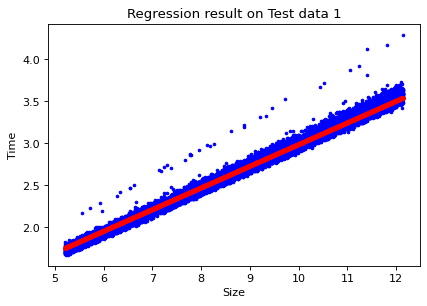

In [ ]:
reg=Ridge(alpha=-4025).fit(X,y)
y_pred1=reg.predict(X_test1)
print_evaluation(y_test1, y_pred1)
plot_result(X_test1, y_test1, y_pred1, 1)

Mean Absolute Error: 0.08340576434997608
Mean Squared Error: 0.014864961172139831


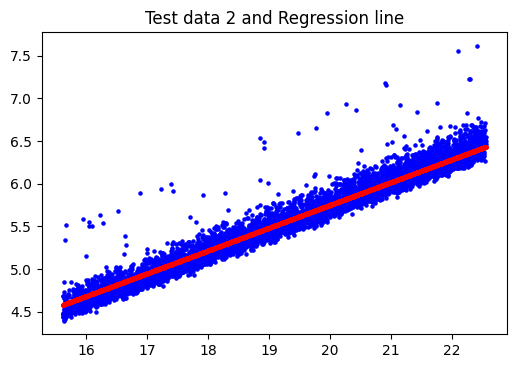

In [ ]:
reg=Ridge(alpha=-6250).fit(X,y)
y_pred2=reg.predict(X_test2)
print_evaluation(y_test2, y_pred2)
plot_result(X_test2, y_test2, y_pred2, 2)

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

Mean Absolute Error: 0.04575865010413095
Mean Squared Error: 0.0037496146092347122


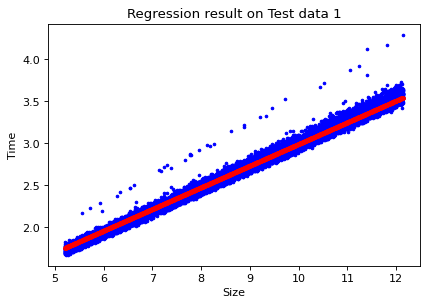

In [ ]:
reg=Lasso(alpha=-0.0146).fit(X,y)
y_pred1=reg.predict(X_test1)
print_evaluation(y_test1, y_pred1)
plot_result(X_test1, y_test1, y_pred1, 1)

Mean Absolute Error: 0.08498697273436759
Mean Squared Error: 0.01484182510526574


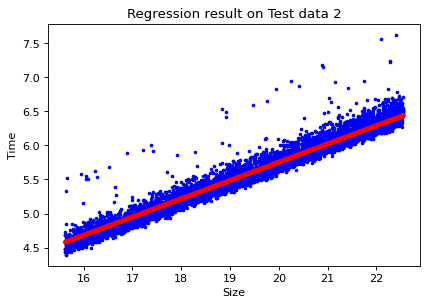

In [ ]:
reg=Lasso(alpha=-0.024).fit(X,y)
y_pred2=reg.predict(X_test2)
print_evaluation(y_test2, y_pred2)
plot_result(X_test2, y_test2, y_pred2, 2)

##SVM

Mean Absolute Error: 0.04900549727927291
Mean Squared Error: 0.004339395036075535


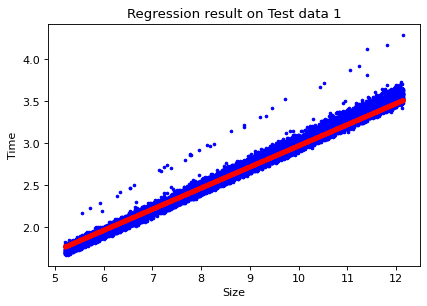

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='linear', C=10)
svr.fit(X,y)
y_pred1_svr=svr.predict(X_test1)
print_evaluation(y_test1, y_pred1_svr)
plot_result(X_test1, y_test1, y_pred1_svr, 1)

Mean Absolute Error: 0.24357013147711581
Mean Squared Error: 0.07644509355903022


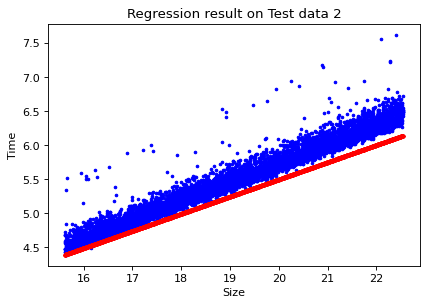

In [ ]:
svr=SVR(kernel='linear', C=10)
svr.fit(X,y)
y_pred2_svr=svr.predict(X_test2)
print_evaluation(y_test2, y_pred2_svr)
plot_result(X_test2, y_test2, y_pred2_svr, 2)